{'a': 1, 'b': 2.39922480620155, 'c': -0.622093023255814, 'd': -0.03875968992248061, 'x': 1}
{'a': 3, 'b': -0.5542635658914727, 'c': -0.8546511627906976, 'd': 0.315891472868217, 'x': 3}
{'a': 1, 'b': -0.18217054263565857, 'c': 1.0406976744186045, 'd': -0.22480620155038755, 'x': 5}
{'a': 3, 'b': 1.2829457364341086, 'c': -0.3081395348837209, 'd': 0.034237726098191215, 'x': 7}


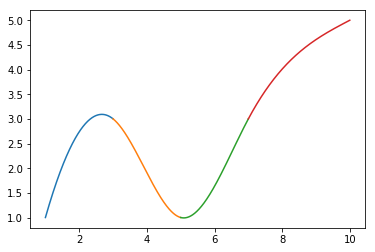

In [1]:
from numpy import poly1d, arange
import matplotlib.pyplot as plt
import copy

def calc_coef(C): 
    if C == None: C = [
        {'x': 1, 'y': 2}, 
        {'x': 3, 'y': 4}, 
        {'x': 5, 'y': 6}, 
        {'x': 7, 'y': 8}, 
        {'x': 9,  'y': 10}
    ]
    
    n = len(C) - 1

    a = [C[i]['y'] for i in range(n + 1)] # array
    b = [0] * n
    d = [0] * n
    h = [C[i+1]['x'] - C[i]['x'] for i in range(n)] # or range(n - 1)
    alpha = [3/h[i]*(a[i+1]-a[i]) - 3/h[i-1]*(a[i] - a[i-1]) for i in range(n)]

    c = [0] * (n + 1) 
    l = [0] * (n + 1)
    mu = [0] * (n + 1)
    z = [0] * (n + 1)

    l[0] = 1
    mu[0] = z[0] = 0

    for i in range(n):
        l[i] = 2 * (C[i+1]['x'] - C[i - 1]['x']) - h[i-1] * mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = 1
    z[n] = c[n] = 0
    len(c)

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2 * c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])

    output_splines = [0] * n
    S = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'x':0}

    for i in range(n):
        S['a'] = a[i]
        S['b'] = b[i]
        S['c'] = c[i]
        S['d'] = d[i]
        S['x'] = C[i]['x']
        output_splines[i] = copy.copy(S)
    return output_splines

def cub_graph(a,b,c,d, x_i, x_i_1):
    """cub_graph takes the i'th coefficient set along with the x[i] and x[i+1]'th
       data pts, and constructs the polynomial spline between the two data pts using
       the poly1d python object (which simply returns a polynomial with a given root."""

    # notice here that we are just building the cubic polynomial piece by piece
    root = poly1d(x_i,True)
    poly = 0
    poly = d*(root)**3
    poly = poly + c*(root)**2
    poly = poly + b*root
    poly = poly + a

    # Set up our domain between data points, and plot the function
    pts = arange(x_i,x_i_1, 0.001)
    plt.plot(pts, poly(pts), '-')
    return

##########################################
# initial values
##########################################
C = [   
        {'x': 1, 'y': 1}, 
        {'x': 3, 'y': 3}, 
        {'x': 5, 'y': 1}, 
        {'x': 7, 'y': 3}, 
        {'x': 10, 'y': 5}
    ]

##########################################
# calc spline coeff
##########################################
S = calc_coef(C)

##########################################
# show plot
##########################################
x = [C[i]['x'] for i in range(len(C))]
for j in range(len(S)):
    print(S[j])
    cub_graph(S[j]['a'],S[j]['b'],S[j]['c'],S[j]['d'],x[j], x[j+1])
plt.show()
